#  First Contour
Make a contour plot and get the first contour in a TPolyMarker.
This macro generates a color contour plot by selecting entries
from an ntuple file.
The TGraph object corresponding to the first contour line is
accessed and displayed into a separate canvas.




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:53 AM.</small></i>

In [1]:
TString dir = gROOT->GetTutorialDir();
dir.Append("/hsimple.C");
dir.ReplaceAll("/./","/");
if (!gInterpreter->IsLoaded(dir.Data())) gInterpreter->LoadMacro(dir.Data());
TFile *file = (TFile*)gROOT->ProcessLineFast("hsimple(1)");
if (!file) return;
TTree *ntuple = (TTree*)file->Get("ntuple");

TCanvas *c1 = new TCanvas("c1","Contours",10,10,800,600);
ntuple->Draw("py:px","px*px+py*py < 20", "contz,list");

We must call update to force the canvas to be painted.  when
painting the contour plot, the list of contours is generated
and a reference to it added to the Root list of special objects

In [2]:
c1->Update();

TCanvas *c2 = new TCanvas("c2","First contour",100,100,800,600);


TObjArray *contours =
   (TObjArray*)gROOT->GetListOfSpecials()->FindObject("contours");
if (!contours) return;
TList *lcontour1 = (TList*)contours->At(0);
if (!lcontour1) return;
TGraph *gc1 = (TGraph*)lcontour1->First();
if (!gc1) return;
if (gc1->GetN() < 10) return;
gc1->SetMarkerStyle(21);
gc1->Draw("alp");

We make a tcutg object with the array obtained from this graph

In [3]:
TCutG *cutg = new TCutG("cutg",gc1->GetN(),gc1->GetX(),gc1->GetY());

We create a polymarker object with npmax points.

In [4]:
const Int_t npmax = 50000;
TPolyMarker *pm = new TPolyMarker(npmax);
Int_t np = 0;
while(1) {
   Double_t x = -4 +8*gRandom->Rndm();
   Double_t y = -4 +8*gRandom->Rndm();
   if (cutg->IsInside(x,y)) {
      pm->SetPoint(np,x,y);
      np++;
      if (np == npmax) break;
   }
}
pm->Draw();

Draw all canvases 

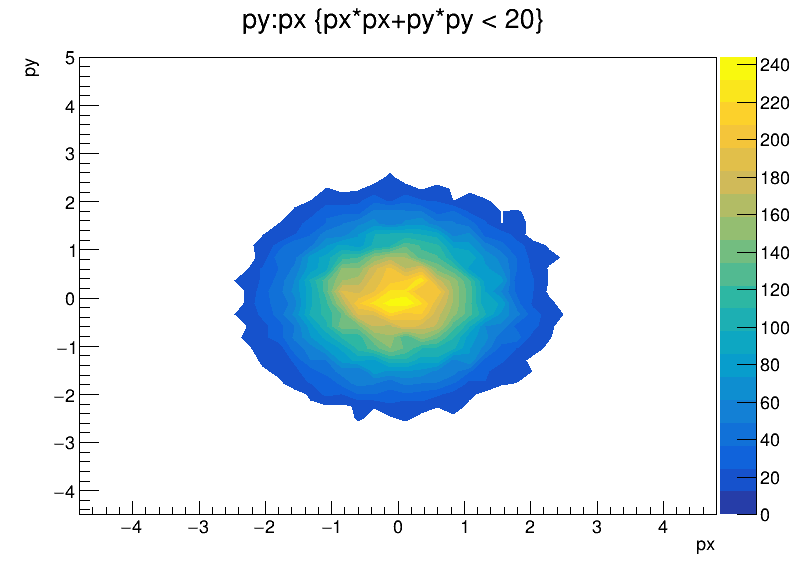

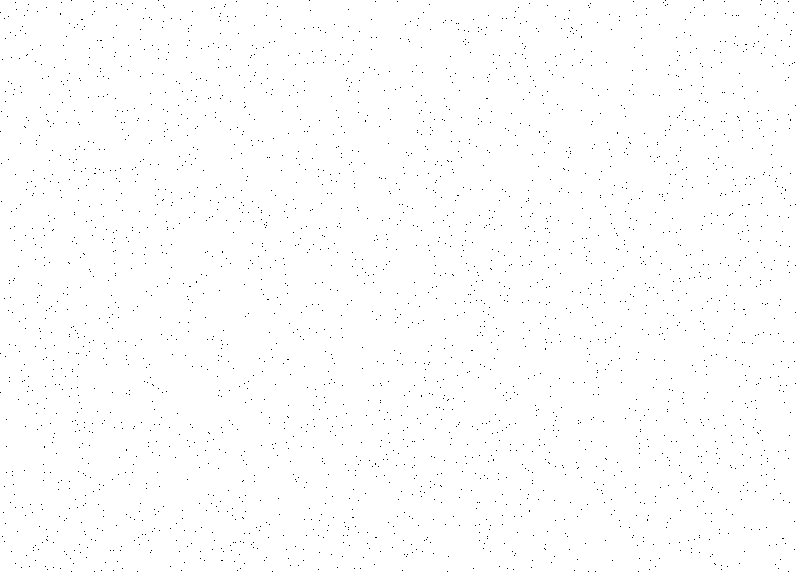

In [5]:
gROOT->GetListOfCanvases()->Draw()